In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import os
print(os.getcwd())

/Users/alexandruparaschiv/Desktop/results_Fn


In [3]:
df = pd.read_csv('fibers3030.txt',skiprows=1,delimiter=' ',names=['f','k','fib'])


In [4]:
df=df.sort_values(by=['f'])

In [5]:
df['f'] *= 100
df['fib'] *= 16

In [6]:
def heatmap(data, x, y, z, xlabel=None, ylabel=None, zlabel=None, vmin=None, vmax=None, cmap=None):
    #courtesy of Mike Staddon

   # Average value over the axis
   means = data.groupby([y, x])[z].mean()

   # Indices
   ylevels, xlevels = means.index.levels

   # Array for plotting
   values = means.values.reshape((len(ylevels), len(xlevels)))

   plt.pcolor(values, vmin=vmin, vmax=vmax, cmap=cmap)

   if xlabel is None:
       xlabel = x

   if ylabel is None:
       ylabel = y

   if zlabel is None:
       zlabel = z

   plt.xlabel(xlabel,fontsize=16)
   #plt.xticks([10,20,30,40,50,60,70,80,90,100])
   plt.ylabel(ylabel,fontsize=16)
   cbar = plt.colorbar(label=zlabel)
   cbar.ax.tick_params(labelsize=16) 
   cbar.ax.set_ylabel(zlabel,fontsize=16)


   plt.xticks([i + 1/2 for i in range(values.shape[1])], xlevels)
   plt.yticks([i + 1/2 for i in range(values.shape[0])], ylevels)

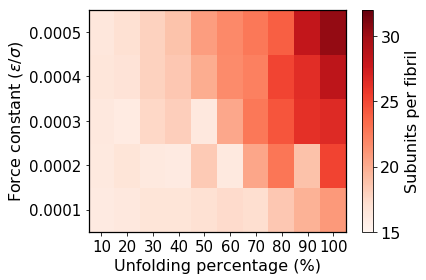

In [7]:
#fig,ax = plt.subplots()
#plt.figure(figsize=(10,10))
fig,ax = plt.subplots()
heatmap(df,'f','k','fib',xlabel="Unfolding percentage (%)", ylabel=r"Force constant ($\varepsilon/ \sigma$)", zlabel="Subunits per fibril",vmin=15,vmax=32,cmap='Reds')
ax.tick_params(axis='x',labelsize='15')
ax.tick_params(axis='y',labelsize='15')
ax.set_xticklabels([10,20,30,40,50,60,70,80,90,100])
[i.set_linewidth(1.25) for i in ax.spines.values()]
plt.tight_layout()
plt.savefig("phase_diagram.eps",format='eps',dpi=1200)



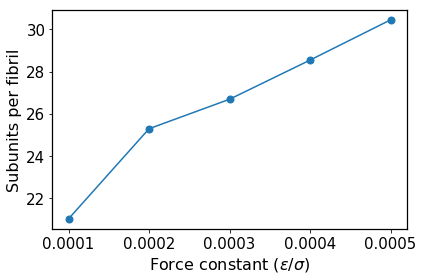

In [8]:
fig,ax = plt.subplots()
plt.plot(sorted(df[df['f']==100]['fib'].values),marker='o',markersize=7,linestyle=None)
ax.tick_params(axis='x',labelsize='15')
ax.tick_params(axis='y',labelsize='15')
ax.set_xticklabels(['',0.0001,0.0002,0.0003,0.0004,0.0005])
ax.set_ylabel("Subunits per fibril",fontsize=16)
ax.set_xlabel(r"Force constant ($\varepsilon/ \sigma$)",fontsize=16)
[i.set_linewidth(1.25) for i in ax.spines.values()]
plt.tight_layout()
plt.savefig("force_vs_subunits_100unfolding.eps",format='eps',dpi=1200)

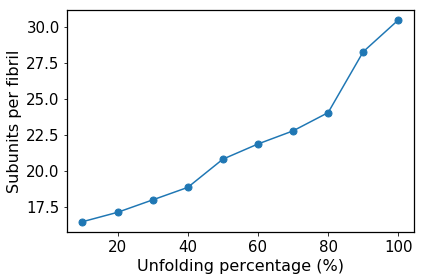

In [9]:
fig,ax = plt.subplots()
plt.plot(sorted(df[df['k']==0.0005]['f'].values),sorted(df[df['k']==0.0005]['fib'].values),marker='o',markersize=7,linestyle=None)
ax.tick_params(axis='x',labelsize='15')
ax.tick_params(axis='y',labelsize='15')
#ax.set_xticklabels([10,20,30,40,50,60,70,80,90,100])
ax.set_ylabel("Subunits per fibril",fontsize=16)
ax.set_xlabel("Unfolding percentage (%)",fontsize=16)
[i.set_linewidth(1.25) for i in ax.spines.values()]
plt.tight_layout()
plt.savefig("unfolding_vs_subunits_force00005.eps",format='eps',dpi=1200)